In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [3]:
def MakeDataFrame(archivo,tmax):
    organism_abundance = np.genfromtxt(archivo, skip_header=1)
    label = np.unique(organism_abundance[:,2]).astype(int);
    stacked_plot = np.zeros([int(tmax), label.shape[0]])
    new_timeRecord = 1;
    timesOfRecord = np.array([])
    time = np.array([])
    for i in range(organism_abundance.shape[0]):
        if organism_abundance[i,0] == new_timeRecord:
            timesOfRecord = np.concatenate((timesOfRecord, [new_timeRecord]))
            time = np.concatenate((time, [organism_abundance[i,1]]))
            new_timeRecord = new_timeRecord + 1
        xlabel = int(organism_abundance[i,0] - 1)
        ylabel = np.argmax(organism_abundance[i,2] == label)
        stacked_plot[xlabel, ylabel] = organism_abundance[i,3]
    return stacked_plot

In [4]:
def AreaPlot(stacked_plot,t1,t2):
    df2 = pd.DataFrame(stacked_plot[t1:t2])
    df2.plot.area(stacked=True, legend=False, linewidth=0);

#  <center>############### Chosing DATA #################</center>

##  <center>Low Mutation Rate</center>

$\mu = 1x10^{-7}$ <br />
1 Initial Virus Strain  ("Cold Start")

In [5]:
%%bash
D=1000

B="../DATA/1_Low-MutRate/ColdStart/mu1e-7_initialDiffDp1_S10P15_R-12499_Bacteria-abundance.txt"
V="../DATA/1_Low-MutRate/ColdStart/mu1e-7_initialDiffDp1_S10P15_R-12499_Phage-abundance.txt"

Nb=$(awk 'BEGIN{max=0} NR>1 {if(($4)>max) max=($4)}END {print max}' $B)
awk -v N="$Nb" -v D="$D" '{ if($4 < N/D) $3 = 0; print $0}' $B > BacteriaFile
Nv=$(awk 'BEGIN{max=0} NR>1 {if(($4)>max) max=($4)}END {print max}' $V)
awk -v N="$Nv" -v D="$D" '{ if($4 < N/D) $3 = 0; print $0}' $V > VirusFile

$\mu = 1x10^{-7}$ <br />
10 Initial Virus Strain  ("Hot Start")

In [5]:
%%bash
D=1000

B="../DATA/1_Low-MutRate/HotStart/mu1e-7_initialDiffDp10_S10P15_R-1987_Bacteria-abundance.txt"
V="../DATA/1_Low-MutRate/HotStart/mu1e-7_initialDiffDp10_S10P15_R-1987_Phage-abundance.txt"

Nb=$(awk 'BEGIN{max=0} NR>1 {if(($4)>max) max=($4)}END {print max}' $B)
awk -v N="$Nb" -v D="$D" '{ if($4 < N/D) $3 = 0; print $0}' $B > BacteriaFile
Nv=$(awk 'BEGIN{max=0} NR>1 {if(($4)>max) max=($4)}END {print max}' $V)
awk -v N="$Nv" -v D="$D" '{ if($4 < N/D) $3 = 0; print $0}' $V > VirusFile

##  <center>High Mutation Rate</center>

$\mu = 5x10^{-7}$ <br />
1 Initial Virus Strain  ("Cold Start")

In [23]:
%%bash
D=100

B="../DATA/2_Hi-MutRate/ColdStart/mu5e-7_initialDiffDp1_S10P15_R-5364_Bacteria-abundance.txt"
V="../DATA/2_Hi-MutRate/ColdStart/mu5e-7_initialDiffDp1_S10P15_R-5364_Phage-abundance.txt"

Nb=$(awk 'BEGIN{max=0} NR>1 {if(($4)>max) max=($4)}END {print max}' $B)
awk -v N="$Nb" -v D="$D" '{ if($4 < N/D) $3 = 0; print $0}' $B > BacteriaFile
Nv=$(awk 'BEGIN{max=0} NR>1 {if(($4)>max) max=($4)}END {print max}' $V)
awk -v N="$Nv" -v D="$D" '{ if($4 < N/D) $3 = 0; print $0}' $V > VirusFile

$\mu = 5x10^{-7}$ <br />
10 Initial Virus Strain  ("Hot Start")

In [ ]:
%%bash
D=100

B="../DATA/2_Hi-MutRate/HotStart/mu5e-7_initialDiffDp10_S10P15_R-13073_Bacteria-abundance.txt"
V="../DATA/2_Hi-MutRate/HotStart/mu5e-7_initialDiffDp10_S10P15_R-13073_Phage-abundance.txt"

Nb=$(awk 'BEGIN{max=0} NR>1 {if(($4)>max) max=($4)}END {print max}' $B)
awk -v N="$Nb" -v D="$D" '{ if($4 < N/D) $3 = 0; print $0}' $B > BacteriaFile

Nv=$(awk 'BEGIN{max=0} NR>1 {if(($4)>max) max=($4)}END {print max}' $V)
awk -v N="$Nv" -v D="$D" '{ if($4 < N/D) $3 = 0; print $0}' $V > VirusFile

#  <center>#########################</center>

In [6]:
tmaxB= ! tail -1 BacteriaFile | awk '{ print $1 }'
tmaxB=int(tmaxB[0])
tmaxV= ! tail -1 VirusFile | awk '{ print $1 }'
tmaxV=int(tmaxV[0])

In [7]:
stacked_plotB=MakeDataFrame("BacteriaFile",tmaxB)
stacked_plotV=MakeDataFrame("VirusFile",tmaxV)

In [8]:
tmax=tmaxV
print(tmax)

2626


#  <center>############### Chosing Time Range #################</center>

In [19]:
t1,t2 = 190,210

<IPython.core.display.Javascript object>


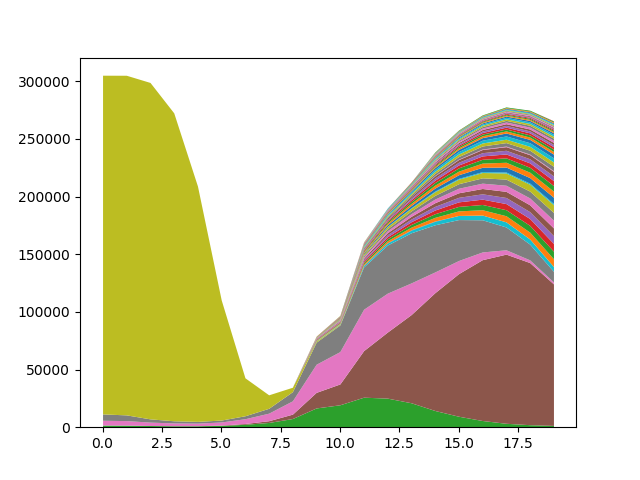

In [20]:
AreaPlot(stacked_plotB,t1,t2)

<IPython.core.display.Javascript object>


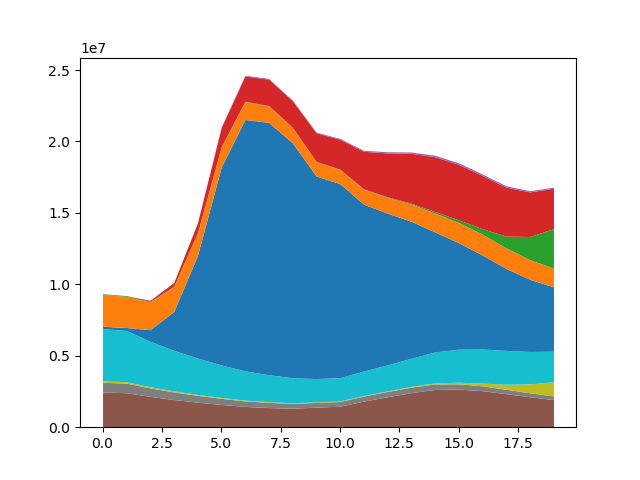

In [21]:
AreaPlot(stacked_plotV,t1,t2)